# Modelo con variables exógenas

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from statsmodels.tsa.arima_model import ARMA

## ARMAX

$x_{t}=c+βY +ϕ_{1} x_{t-1}+θ _{1} ϵ _{t-1}+ϵ_{t}$

Donde $Y$ representa los valores de los factores externos o variables exógenas, y $β$ representa los pesos de los factores.

In [ ]:
df = pd.read_csv('./drive/MyDrive/DatosInvestigacion/final_train_2015.csv', index_col=0, parse_dates=True)

In [ ]:
df = df.asfreq('h')

In [ ]:
model_a1ma1X = ARMA(df.SRGLOAVG1H, exog = df.TAMAX1H, order=(2,3))
results_ar1ma1X = model_a1ma1X.fit()
results_ar1ma1X.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             SRGLOAVG1H   No. Observations:                 7008
Model:                     ARMA(2, 3)   Log Likelihood              -42018.904
Method:                       css-mle   S.D. of innovations             97.206
Date:                Mon, 20 Dec 2021   AIC                          84053.808
Time:                        19:35:46   BIC                          84108.647
Sample:                    01-01-2015   HQIC                         84072.704
                         - 10-20-2015                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -572.1880     13.892    -41.189      0.000    -599.415    -544.961
TAMAX1H             55.1352      0.990     55.689      0.000      53.195      57.076
ar.L1.SRGLOAVG1H     1.6343      0.030     55.333      0.000       1.576       1.692
ar.L2.SRGLOAVG1H    -0.7186      0.022    -32.178      0.000      -0.762      -0.675
ma.L1.SRGLOAVG1H    -0.8163      0.032    -25.501      0.000      -0.879      -0.754
ma.L2.SRGLOAVG1H     0.0435      0.016      2.639      0.008       0.011       0.076
ma.L3.SRGLOAVG1H     0.0597      0.015      4.098      0.000       0.031       0.088
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1371           -0.3140j            1.1796           -0.0429
AR.2            1.1371           +0.3140j            1.1796            0.0429
MA.1            1.9090           -0.2001j            1.9195           -0.0166
MA.2            1.9090           +0.2001j            1.9195            0.0166
MA.3           -4.5468           -0.0000j            4.5468           -0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
start = df.shape[0]

In [ ]:
start

7008

In [ ]:
df_test = pd.read_csv('./drive/MyDrive/DatosInvestigacion/final_test_2015.csv', index_col=0, parse_dates=True)

In [ ]:
df_test.head()

,DC,PAAVG1H,PAMAX1H,PAMIN1H,PRSUM1H,RHAVG1H,RHMAX1H,RHMIN1H,SRDIFAVG1H,SRDIFMAX1H,SRDIFMIN1H,SRDIFSUM1H,SRGLOAVG1H,SRGLOMAX1H,SRGLOMIN1H,SRGLOSUM1H,TAAVG1H,TAMAX1H,TAMIN1H,TS1AVG1H,TS1MAX1H,TS1MIN1H,TS2AVG1H,TS2MAX1H,TS2MIN1H,TS3AVG1H,TS3MAX1H,TS3MIN1H,TS4AVG1H,TS4MAX1H,TS4MIN1H,TS5AVG1H,TS5MAX1H,TS5MIN1H,TS6AVG1H,TS6MAX1H,TS6MIN1H,TS7AVG1H,TS7MAX1H,TS7MIN1H,WD1HA,WD1HX,WDGM,WGD1HX,WGDH,WR1H,WS1HA,WS1HM,WS1HX
Local_Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-10-20 01:00:00,13.1,744.9,745.3,744.5,0.0,94,96,90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2,10.0,8.3,9.1,9.7,8.7,10.8,11.2,10.4,13.5,13.6,13.4,13.7,13.8,13.7,13.9,14,13.8,13.7,13.7,13.7,13.7,13.7,13.7,50,95,56,73.0,0.0,36.0,2.5,0.9,3.8
2015-10-20 02:00:00,13.1,744.3,744.5,744.0,0.0,94,95,90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.3,10.0,9.1,10.1,10.5,9.7,11.6,12,11.2,13.4,13.4,13.4,13.6,13.7,13.5,13.7,13.8,13.6,13.7,13.7,13.7,13.7,13.7,13.7,35,164,21,37.0,1.0,42.0,2.8,0.0,4.8
2015-10-20 03:00:00,13.0,744.2,744.3,744.1,0.0,92,94,91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.9,10.3,9.4,10.8,11.1,10.5,12.2,12.4,12,13.4,13.4,13.3,13.4,13.5,13.3,13.5,13.6,13.5,13.7,13.8,13.7,13.7,13.7,13.7,38,70,20,34.0,2.0,39.0,2.7,1.1,4.0
2015-10-20 04:00:00,13.0,744.2,744.3,744.1,0.0,91,93,88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.5,10.8,10.2,11.4,11.6,11.1,12.5,12.7,12.4,13.3,13.3,13.3,13.3,13.3,13.2,13.4,13.5,13.3,13.8,13.8,13.8,13.7,13.7,13.7,51,90,26,58.0,3.0,31.0,2.1,0.0,3.7
2015-10-20 05:00:00,13.0,744.3,744.4,744.1,0.0,90,95,87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.6,11.1,10.1,11.7,11.7,11.6,12.7,12.7,12.7,13.2,13.3,13.2,13.1,13.2,13.1,13.3,13.3,13.2,13.8,13.8,13.8,13.7,13.7,13.7,56,108,39,73.0,4.0,27.0,1.8,0.6,3.1


In [ ]:
results_ar1ma1X.k_ar

2

 If the model is an ARMAX and out-of-sample forecasting is
requested, exog must be given. Note that you'll need to pass
k_ar additional lags for any exogenous variables. E.g., if you
fit an ARMAX(2, q) model and want to predict 5 steps, you need 7
observations to do this.

In [ ]:
df_pred = results_ar1ma1X.predict(start,start+100,exog=df_test['TAMAX1H'])

In [ ]:
df_show_pred = df_pred.between_time('07:00:00','18:00:00')
df_show_test = df_test.between_time('07:00:00','18:00:00')

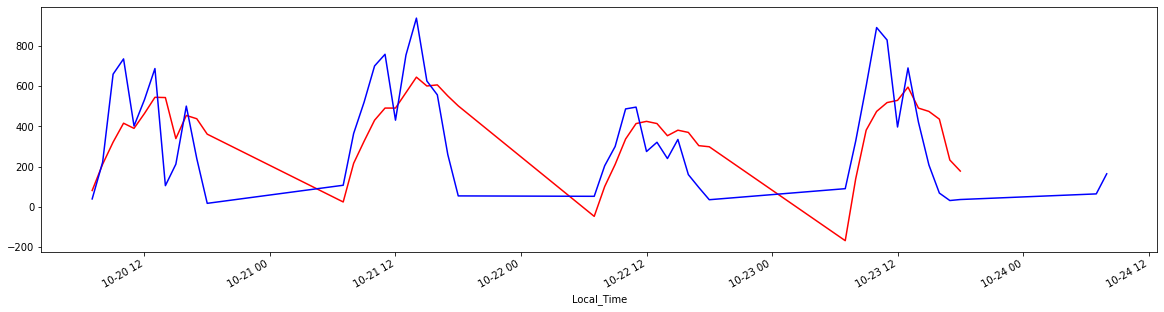

In [ ]:
df_show_pred.plot(figsize = (20,5), color = "red")
df_show_test.iloc[:50]['SRGLOAVG1H'].plot(color = "blue")